In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
# np.set_printoptions(threshold=sys.maxsize)
import statistics
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

__Processamento/Tratamento de Dados__

In [2]:
df_comed = pd.read_csv("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/COMED_hourly.csv")
df_comed

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0
...,...,...
66492,2018-01-01 20:00:00,13858.0
66493,2018-01-01 21:00:00,13758.0
66494,2018-01-01 22:00:00,13627.0
66495,2018-01-01 23:00:00,13336.0


In [3]:
df_dom = pd.read_csv("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/DOM_hourly.csv")
df_dom

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0
...,...,...
116184,2018-01-01 20:00:00,18418.0
116185,2018-01-01 21:00:00,18567.0
116186,2018-01-01 22:00:00,18307.0
116187,2018-01-01 23:00:00,17814.0


In [4]:
df_seasons = pd.read_excel("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/Seasons.xlsx")
df_seasons

,Datetime,Season
0,2011-01-01,Inverno
1,2011-01-02,Inverno
2,2011-01-03,Inverno
3,2011-01-04,Inverno
4,2011-01-05,Inverno
...,...,...
2552,2017-12-27,Inverno
2553,2017-12-28,Inverno
2554,2017-12-29,Inverno
2555,2017-12-30,Inverno


In [5]:
# Juntando os DFs DOM e COMED
df_final = pd.merge(df_dom,df_comed,on='Datetime', how='inner', sort=True)

In [6]:
# Filtrar o df entre os anos de 2013 e 2017
df_final['Datetime'] = pd.to_datetime(df_final['Datetime'])
start_date = "2011-01-01"
end_date = "2017-12-31"
df_final = df_final[(df_final['Datetime'] >= start_date) & (df_final['Datetime'] <= end_date)]
df_final = df_final.reset_index(drop=True)

In [7]:
df_final['Data'] = df_final['Datetime'].dt.date
df_final['Hora'] = df_final['Datetime'].dt.time
df_final['Data'] = pd.to_datetime(df_final['Data'])
# df_final['Hora'] = pd.to_datetime(df_final['Hora'])
df_final.drop('Datetime',axis=1,inplace=True)
column_order = ['Data','Hora','DOM_MW','COMED_MW']
df_final = df_final[column_order]

In [8]:
# datelist = np.unique(df_final['Data'])
# datelist

In [9]:
df_seasons.rename(columns={'Datetime':'Data'}, inplace=True)
df_seasons['Data'] = (pd.to_datetime(df_seasons['Data'])).dt.date
df_seasons['Data'] = pd.to_datetime(df_seasons['Data'])
df_final = pd.merge(df_final,df_seasons,on='Data', how='inner', sort=True)

In [10]:
df_final

,Data,Hora,DOM_MW,COMED_MW,Season
0,2011-01-01,01:00:00,10137.0,9631.0,Inverno
1,2011-01-01,02:00:00,9918.0,9273.0,Inverno
2,2011-01-01,03:00:00,9745.0,9011.0,Inverno
3,2011-01-01,04:00:00,9646.0,8741.0,Inverno
4,2011-01-01,05:00:00,9711.0,8694.0,Inverno
...,...,...,...,...,...
61341,2017-12-30,20:00:00,14646.0,13686.0,Inverno
61342,2017-12-30,21:00:00,14664.0,13632.0,Inverno
61343,2017-12-30,22:00:00,14566.0,13423.0,Inverno
61344,2017-12-30,23:00:00,14249.0,13191.0,Inverno


In [11]:
nan_or_empty_count = df_final.isna().sum()
nan_or_empty_count

Data        0
Hora        0
DOM_MW      0
COMED_MW    0
Season      0
dtype: int64

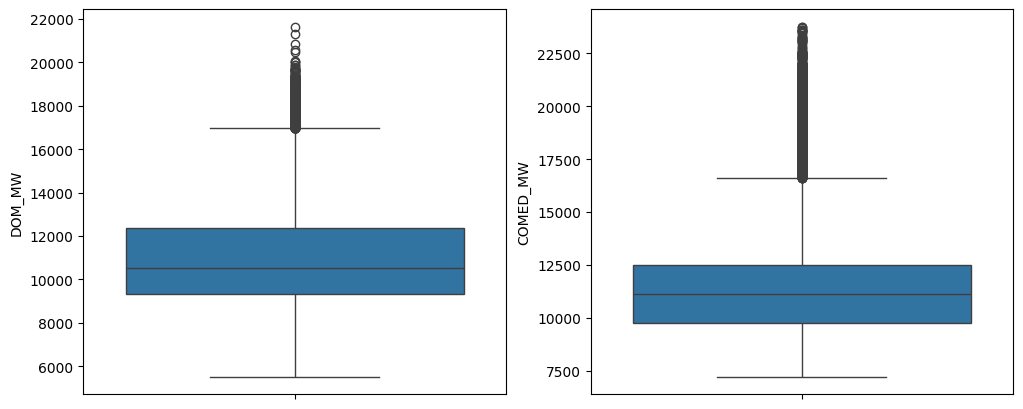

In [12]:
plt.rcParams["figure.figsize"] = [12, 5]
fig, ax =plt.subplots(1,2)
y = sns.boxplot(y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
y = sns.boxplot(y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)

In [13]:
outliers = []
desv_pad = statistics.stdev(df_final['DOM_MW'])
media = statistics.mean(df_final['DOM_MW'])
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_final['DOM_MW']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

percentual = len(outliers)/len(df_final['DOM_MW'])*100
# percentual da coluna que é outlier
print('Percentual: ',percentual,'%')

Percentual:  0.518371205946598 %


In [14]:
outliers = []
desv_pad = statistics.stdev(df_final['COMED_MW'])
media = statistics.mean(df_final['COMED_MW'])
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_final['COMED_MW']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

percentual = len(outliers)/len(df_final['COMED_MW'])*100
# percentual da coluna que é outlier
print('Percentual: ',percentual,'%')

Percentual:  1.5355524402569034 %


__Análise e Exploração de Dados__

In [15]:
# Informações sobre o df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61346 entries, 0 to 61345
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      61346 non-null  datetime64[ns]
 1   Hora      61346 non-null  object        
 2   DOM_MW    61346 non-null  float64       
 3   COMED_MW  61346 non-null  float64       
 4   Season    61346 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.8+ MB


In [16]:
df_final.describe()

,DOM_MW,COMED_MW
count,61346.000000,61346.000000
mean,10970.609102,11414.969696
std,2411.392003,2309.547682
min,5518.000000,7237.000000
25%,9337.000000,9773.000000
50%,10512.000000,11147.000000
75%,12387.000000,12515.000000
max,21651.000000,23753.000000


<Axes: ylabel='Count'>

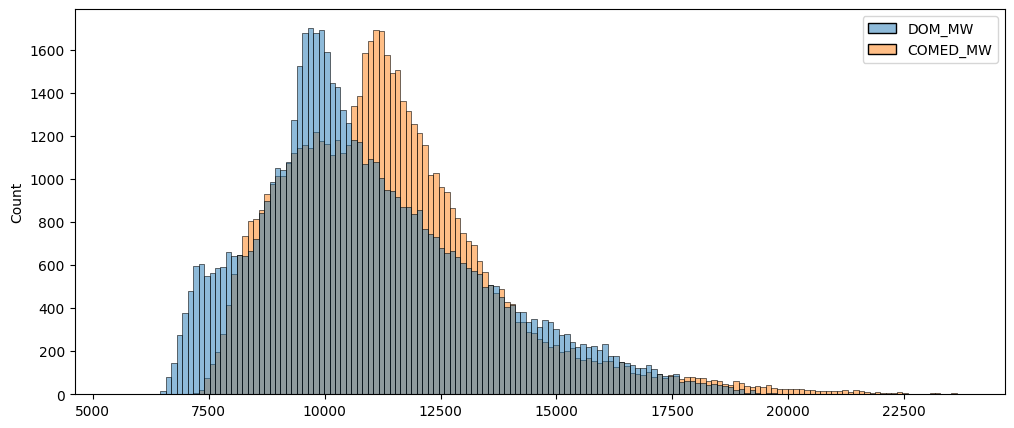

In [17]:
# Histograma dos dados de consumo de energia
sns.histplot(data=df_final)

<Axes: xlabel='Ano', ylabel='value'>

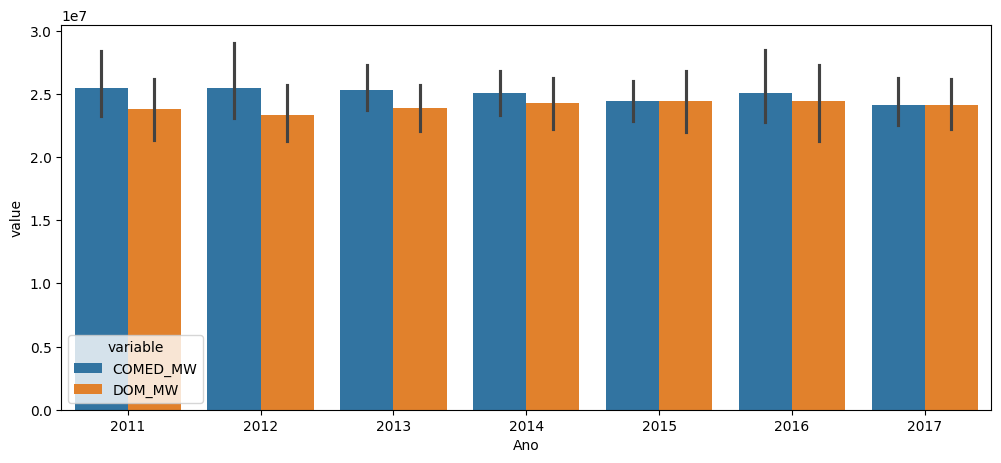

In [18]:
df_final['Ano'] = pd.DatetimeIndex(df_final['Data']).year
df_change = pd.melt(df_final, id_vars=['Ano', 'Season'], value_vars=['DOM_MW', 'COMED_MW'])
df_summed = df_change.groupby(['Ano', 'Season','variable'])['value'].sum().reset_index()

sns.barplot(x='Ano', y='value', hue='variable', data=df_summed)

<Axes: xlabel='Season', ylabel='value'>

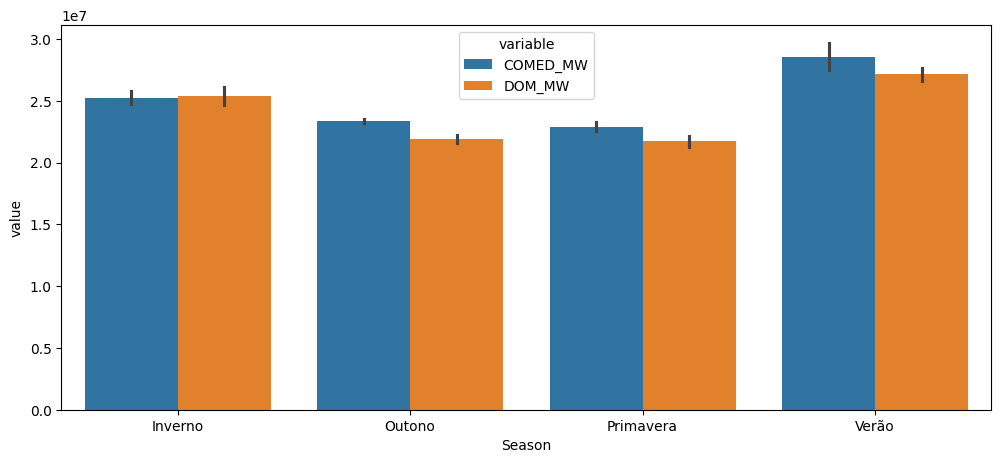

In [19]:
sns.barplot(x='Season', y='value', hue='variable', data=df_summed)

In [20]:
# df_mean = df_change.groupby(['Ano', 'Season','variable'])['value'].mean().reset_index()
# sns.barplot(x='Ano', y='value', hue='variable', data=df_mean)
# sns.barplot(x='Season', y='value', hue='variable', data=df_mean)

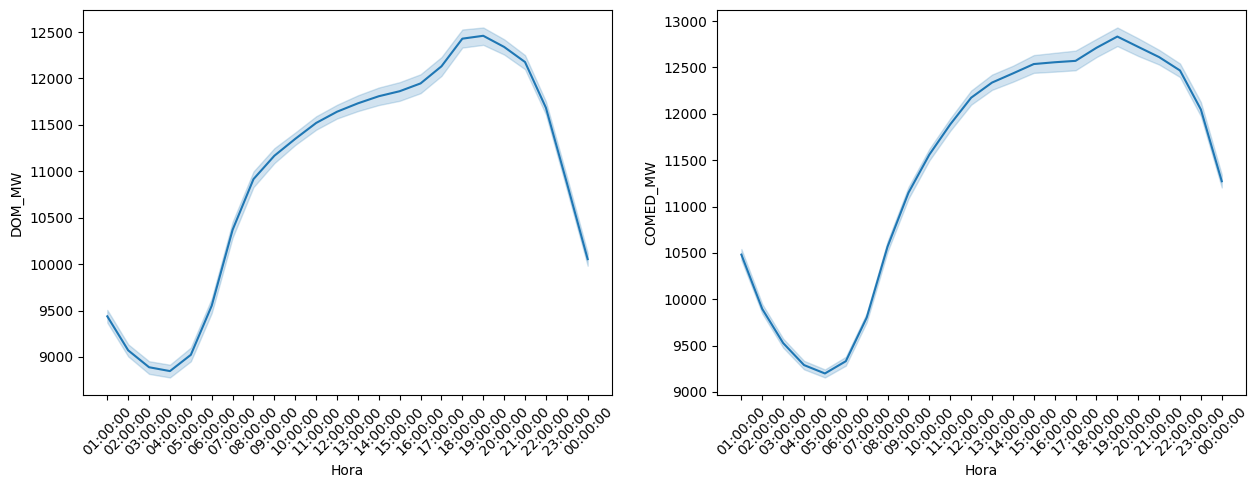

In [21]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax =plt.subplots(1,2)
y = sns.lineplot(x=df_final["Hora"].astype(str),y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
y = sns.lineplot(x=df_final["Hora"].astype(str),y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)

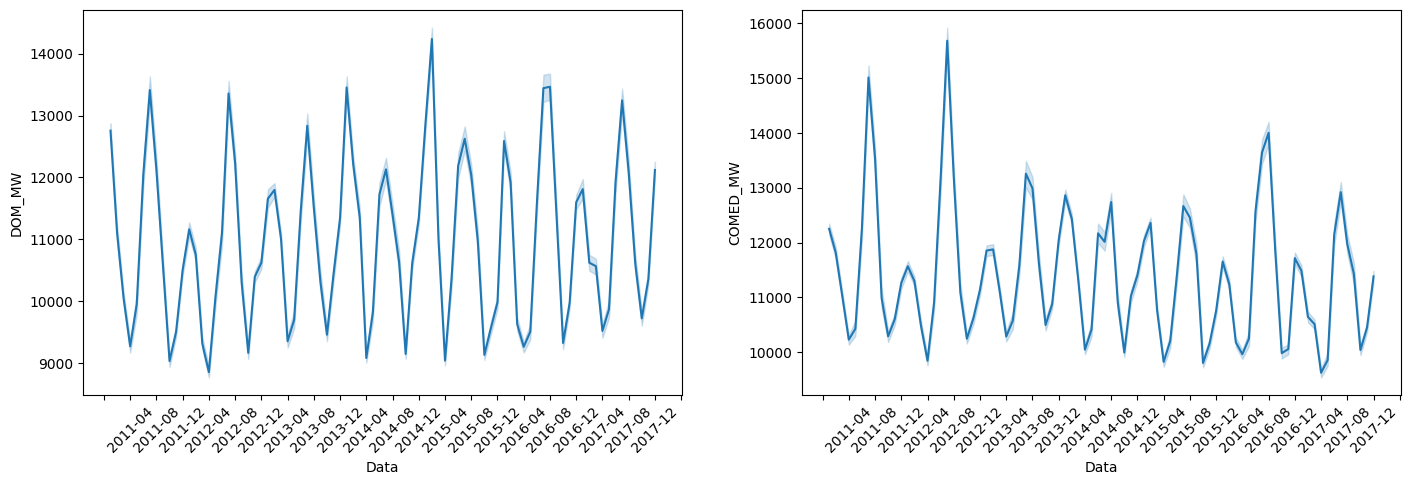

In [22]:
plt.rcParams["figure.figsize"] = [17, 5]
fig, ax =plt.subplots(1,2)
y = sns.lineplot(x=pd.to_datetime(df_final['Data']).dt.strftime('%Y-%m'),y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
locator = mdates.DayLocator(interval=4)
y.xaxis.set_major_locator(locator)
y = sns.lineplot(x=pd.to_datetime(df_final['Data']).dt.strftime('%Y-%m'),y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)
locator = mdates.DayLocator(interval=4)
y.xaxis.set_major_locator(locator)

In [23]:
df_final = df_final.drop(columns=['Ano'])

In [24]:
df_final['Datetime'] = df_final.apply(lambda r : pd.datetime.combine(r['Data'],r['Hora']),1)
df_final['Datetime'] = pd.to_datetime(df_final['Datetime'])

C:\Users\MASTER\AppData\Local\Temp\ipykernel_5476\2089720483.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_final['Datetime'] = df_final.apply(lambda r : pd.datetime.combine(r['Data'],r['Hora']),1)


In [25]:
df_final.set_index('Datetime', inplace=True)
df_final = df_final.drop(columns=['Data','Hora'])
df_final

,DOM_MW,COMED_MW,Season
Datetime,,,
2011-01-01 01:00:00,10137.0,9631.0,Inverno
2011-01-01 02:00:00,9918.0,9273.0,Inverno
2011-01-01 03:00:00,9745.0,9011.0,Inverno
2011-01-01 04:00:00,9646.0,8741.0,Inverno
2011-01-01 05:00:00,9711.0,8694.0,Inverno
...,...,...,...
2017-12-30 20:00:00,14646.0,13686.0,Inverno
2017-12-30 21:00:00,14664.0,13632.0,Inverno
2017-12-30 22:00:00,14566.0,13423.0,Inverno


In [26]:
df_DOM = df_final[['DOM_MW']].copy()
df_DOM

,DOM_MW
Datetime,
2011-01-01 01:00:00,10137.0
2011-01-01 02:00:00,9918.0
2011-01-01 03:00:00,9745.0
2011-01-01 04:00:00,9646.0
2011-01-01 05:00:00,9711.0
...,...
2017-12-30 20:00:00,14646.0
2017-12-30 21:00:00,14664.0
2017-12-30 22:00:00,14566.0


In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [28]:
# Load your time series data into a pandas DataFrame

scaler = MinMaxScaler()
df_DOM['scaled_data'] = scaler.fit_transform(df_DOM['DOM_MW'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df_DOM) * 0.8)
train_data = df_DOM[:train_size]
test_data = df_DOM[train_size:]

In [29]:
# Fit an ARIMA model to the training data
# You can adjust the order (p, d, q) as per your dataset

from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

p, d, q = 2, 0, 2

In [30]:
arima_model = ARIMA(train_data['DOM_MW'], order=(p, d, q))
arima_result = arima_model.fit()

C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
# Prepare the data for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

In [32]:
sequence_length = 10  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data['scaled_data'], sequence_length)
X_test, y_test = create_sequences(test_data['scaled_data'], sequence_length)

# Build the LSTM model

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1, batch_size=32)

1534/1534 [==============================] - 16s 9ms/step - loss: 0.0038


In [33]:
arima_predictions = arima_result.forecast(steps=len(test_data))
lstm_predictions = model.predict(X_test)

C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


384/384 [==============================] - 2s 3ms/step


C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


384/384 [==============================] - 2s 4ms/step


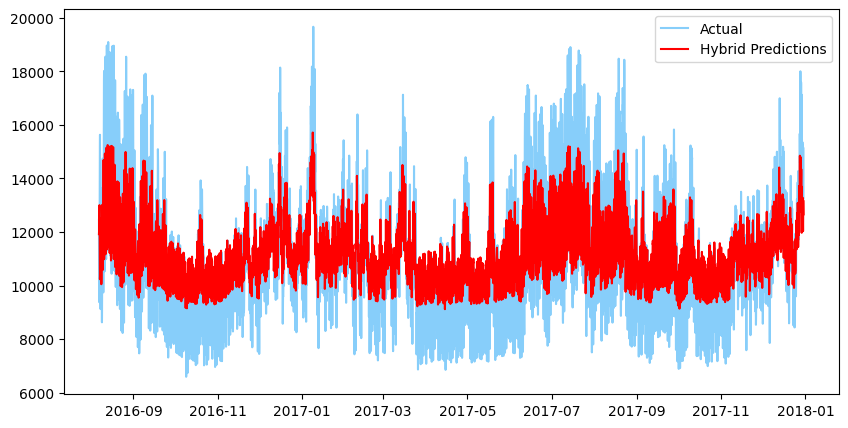

In [34]:
# ARIMA predictions
# arima_predictions = arima_result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')
arima_predictions = arima_result.forecast(steps=len(test_data))

# LSTM predictions
lstm_predictions = model.predict(X_test)

# Inverse transform the scaled LSTM predictions to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Ensure that both arrays have the same length
min_length = min(len(arima_predictions), len(lstm_predictions))
arima_predictions = arima_predictions[:min_length]
lstm_predictions = lstm_predictions[:min_length]

# Ensure that both arrays have the same shape and are 1-dimensional
arima_predictions = arima_predictions.squeeze()
lstm_predictions = lstm_predictions.squeeze()
hybrid_predictions = 0.5 * arima_predictions + 0.5 * lstm_predictions

# Make sure that test_data.index matches the length of hybrid_predictions
test_data_index = test_data.index[:len(hybrid_predictions)]

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data_index, test_data['DOM_MW'][:len(hybrid_predictions)], label='Actual', color='lightskyblue')
plt.plot(test_data_index, hybrid_predictions, label='Hybrid Predictions', color='red')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error

test_data_trimmed = test_data.iloc[:len(hybrid_predictions)]
mse = mean_squared_error(test_data_trimmed['DOM_MW'], hybrid_predictions)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 5597541.60695324


In [36]:
rmse = np.sqrt(mse)
rmse

2365.9124258841957

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data_trimmed['DOM_MW'], hybrid_predictions)
mae

1857.620806139961

### COMED

In [38]:
df_COMED = df_final[['COMED_MW']].copy()
df_COMED

,COMED_MW
Datetime,
2011-01-01 01:00:00,9631.0
2011-01-01 02:00:00,9273.0
2011-01-01 03:00:00,9011.0
2011-01-01 04:00:00,8741.0
2011-01-01 05:00:00,8694.0
...,...
2017-12-30 20:00:00,13686.0
2017-12-30 21:00:00,13632.0
2017-12-30 22:00:00,13423.0


In [39]:
# Load your time series data into a pandas DataFrame

# Normalize the data (LSTM requires scaled data)
scaler = MinMaxScaler()
df_COMED['scaled_data'] = scaler.fit_transform(df_COMED['COMED_MW'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df_COMED) * 0.8)
train_data = df_COMED[:train_size]
test_data = df_COMED[train_size:]

In [40]:
# Fit an ARIMA model to the training data
# You can adjust the order (p, d, q) as per your dataset
p, d, q = 2, 0, 2
arima_model = ARIMA(train_data['COMED_MW'], order=(p, d, q))
arima_result = arima_model.fit()

C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
sequence_length = 10  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data['scaled_data'], sequence_length)
X_test, y_test = create_sequences(test_data['scaled_data'], sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32)

1534/1534 [==============================] - 15s 9ms/step - loss: 0.0023


C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MASTER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


384/384 [==============================] - 2s 3ms/step


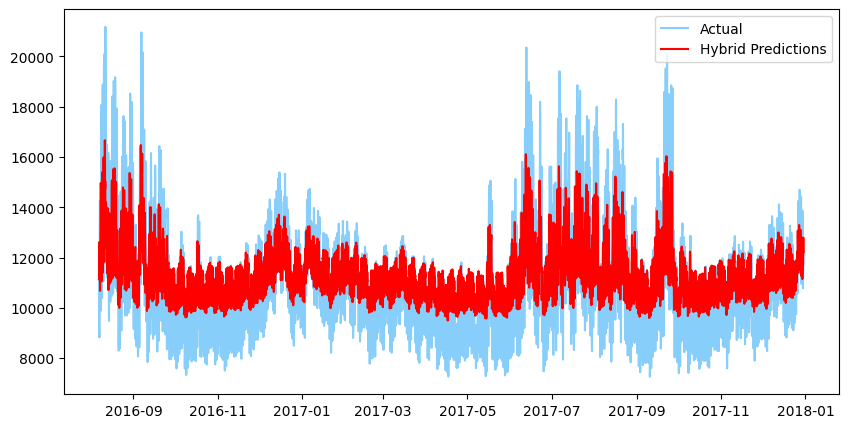

In [42]:
# ARIMA predictions
# arima_predictions = arima_result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')
arima_predictions = arima_result.forecast(steps=len(test_data))

# LSTM predictions
lstm_predictions = model.predict(X_test)

# Inverse transform the scaled LSTM predictions to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Ensure that both arrays have the same length
min_length = min(len(arima_predictions), len(lstm_predictions))
arima_predictions = arima_predictions[:min_length]
lstm_predictions = lstm_predictions[:min_length]

# Ensure that both arrays have the same shape and are 1-dimensional
arima_predictions = arima_predictions.squeeze()
lstm_predictions = lstm_predictions.squeeze()

# Combine ARIMA and LSTM predictions (you can adjust the weightage)
hybrid_predictions = 0.5 * arima_predictions + 0.5 * lstm_predictions

# Make sure that test_data.index matches the length of hybrid_predictions
test_data_index = test_data.index[:len(hybrid_predictions)]

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data_index, test_data['COMED_MW'][:len(hybrid_predictions)], label='Actual', color='lightskyblue')
plt.plot(test_data_index, hybrid_predictions, label='Hybrid Predictions', color='red')
plt.legend()
plt.show()


In [43]:
test_data_trimmed = test_data.iloc[:len(hybrid_predictions)]
mse = mean_squared_error(test_data_trimmed['COMED_MW'], hybrid_predictions)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 5023009.152857908


In [44]:
rmse = np.sqrt(mse)
rmse

2241.207074961595

In [45]:
mae = mean_absolute_error(test_data_trimmed['COMED_MW'], hybrid_predictions)
mae

1745.5290668682896